In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import datetime

In [3]:
dos_dict = {}

In [4]:
for directory in os.listdir('data'):
    if (directory[:4] == 'Grid'):
        dos_file = os.path.join('data', directory, 'dos.dat')
        dos_dict[directory] = np.loadtxt(dos_file)

In [5]:
print(dos_dict.keys())

dict_keys(['Grid-128-64-zplus=0.01', 'Grid-32-8-zplus=0.01', 'Grid-128-128', 'Grid-48-8-zplus=0.01', 'Grid-96-8-zplus=0.01', 'Grid-24-8', 'Grid-96-16', 'Grid-128-64', 'Grid-96-24', 'Grid-96-96', 'Grid-128-32', 'Grid-96-16-zplus=0.01', 'Grid-64-32-zplus=0.01', 'Grid-64-8-zplus=0.01', 'Grid-16-8-zplus=0.01', 'Grid-16-8', 'Grid-64-16', 'Grid-128-32-zplus=0.01', 'Grid-32-16-zplus=0.01', 'Grid-48-24', 'Grid-64-8', 'Grid-64-64-zplus=0.01', 'Grid-48-16-zplus=0.01', 'Grid-32-32', 'Grid-48-16', 'Grid-16-16', 'Grid-32-8', 'Grid-48-48-zplus=0.01', 'Grid-64-64', 'Grid-96-32-zplus=0.01', 'Grid-96-24-zplus=0.01', 'Grid-48-48', 'Grid-64-16-zplus=0.01', 'Grid-64-32', 'Grid-24-24-zplus=0.01', 'Grid-96-96-zplus=0.01', 'Grid-128-8', 'Grid-24-24', 'Grid-128-128-zplus=0.01', 'Grid-96-8', 'Grid-128-8-zplus=0.01', 'Grid-32-16', 'Grid-48-8', 'Grid-96-48', 'Grid-96-48-zplus=0.01', 'Grid-48-24-zplus=0.01', 'Grid-24-8-zplus=0.01', 'Grid-16-16-zplus=0.01', 'Grid-128-16-zplus=0.01', 'Grid-32-32-zplus=0.01', 'Grid-

In [14]:
def plot_dos(keys_list):
    plt.figure(figsize = (15, 5))
    
    for key in keys_list:
        if (key.find('zplus') == -1):
            label = f'{key}-zplus=0.1'
        else:
            label = key
        plt.plot(dos_dict[key][:,0], dos_dict[key][:,1], label = label, linewidth = 0.7)

    plt.ylabel('dos')
    plt.xlabel('w')
    plt.legend()

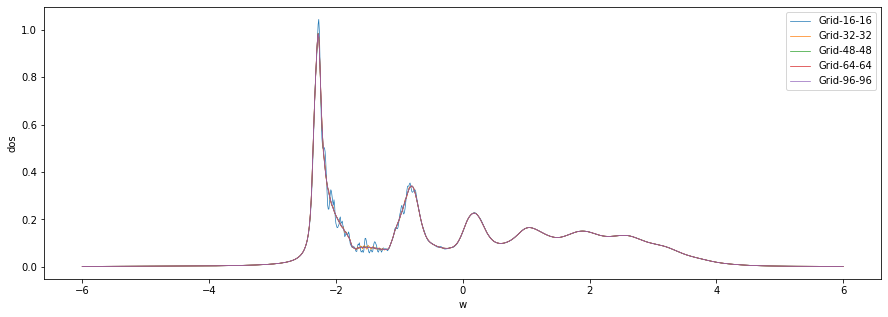

In [16]:
keys_list = ['Grid-16-16', 'Grid-32-32', 'Grid-48-48', 'Grid-64-64', 'Grid-96-96']

plot_dos(keys_list)

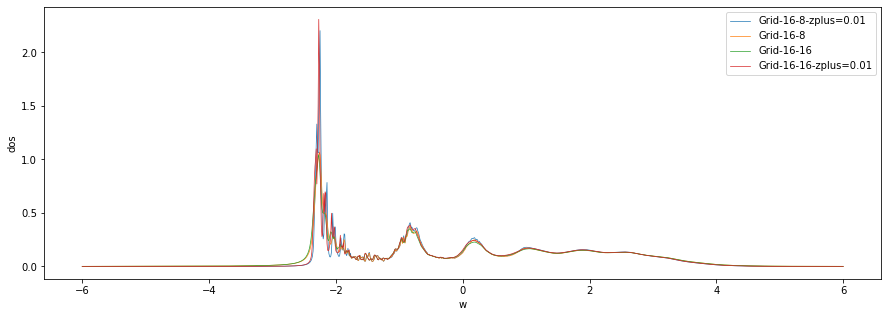

In [17]:
keys_list = [key for key in dos_dict.keys() if key[5:7] == '16']
plot_dos(keys_list)

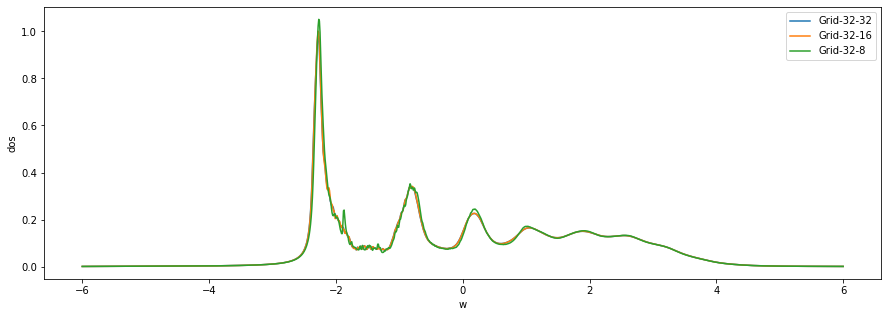

In [12]:
keys_list = [key for key in dos_dict.keys() if key[5:7] == '32']
plot_dos(keys_list)

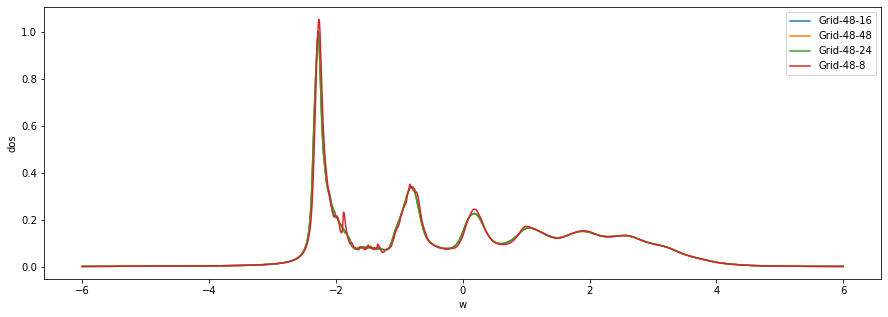

In [13]:
keys_list = [key for key in dos_dict.keys() if key[5:7] == '48']
plot_dos(keys_list)

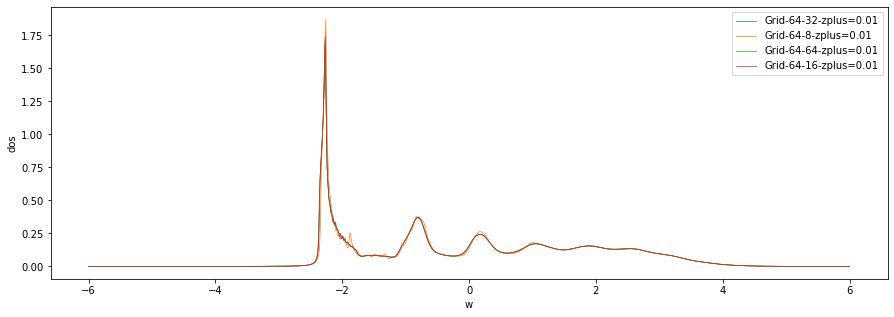

In [40]:
keys_list = [key for key in dos_dict.keys() if key[5:7] == '64']
plot_dos(keys_list)

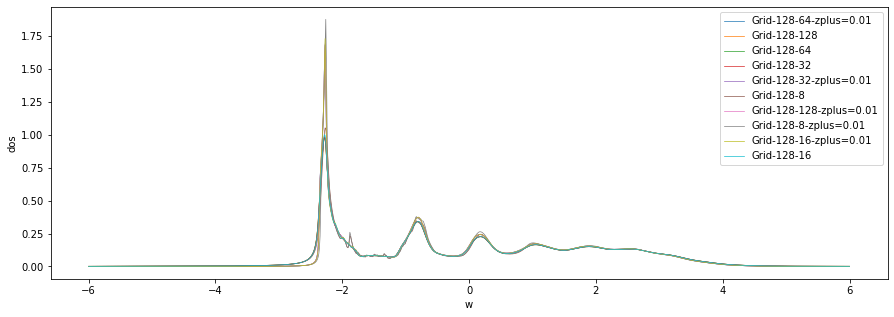

In [8]:
keys_list = [key for key in dos_dict.keys() if key[5:8] == '128']
plot_dos(keys_list)

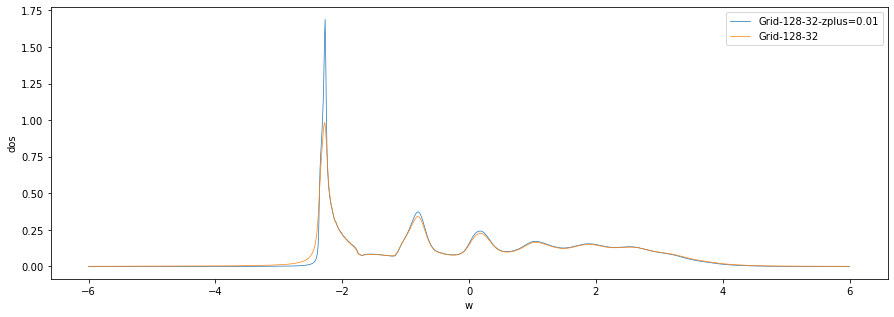

In [13]:
keys_list = ['Grid-128-32-zplus=0.01', 'Grid-128-32']
plot_dos(keys_list)

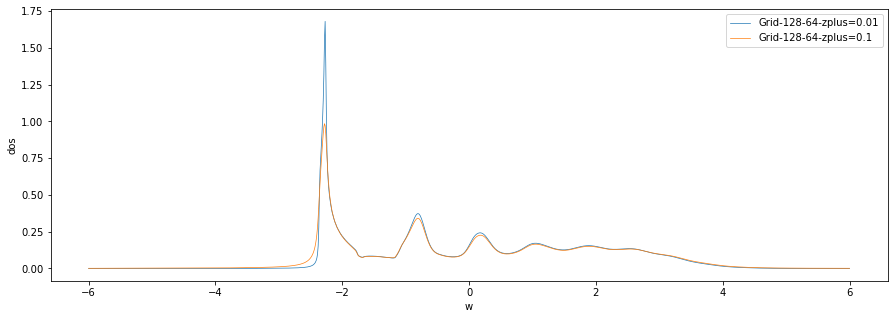

In [15]:
keys_list = [key for key in dos_dict.keys() if key.find('128-64') != -1]
plot_dos(keys_list)

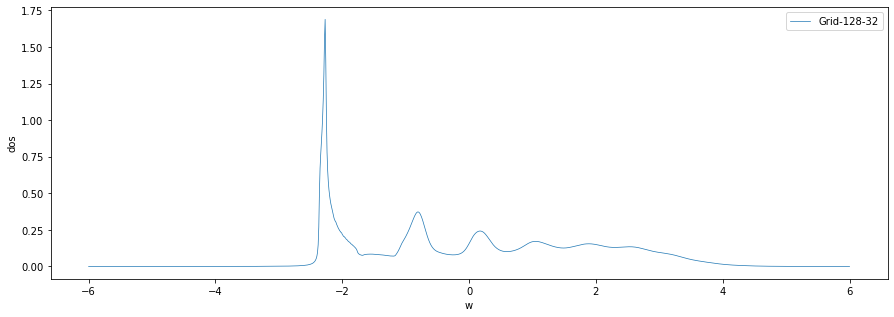

In [62]:
keys_list = ['Grid-128-32']
plot_dos(keys_list)

In [1]:
keys_list = ['Grid-128-32', 'Grid-128-32-zplus=0.01']
plot_dos(keys_list)

NameError: name 'plot_dos' is not defined

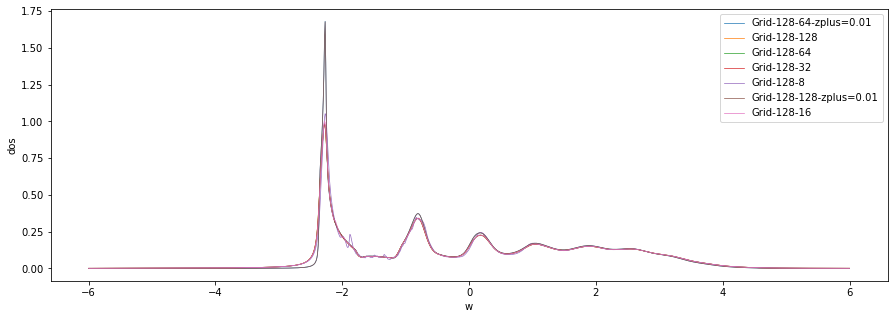

In [18]:
forbidden_list = ['Grid-128-8-zplus=0.01', 'Grid-128-16-zplus=0.01', 'Grid-128-32-zplus=0.01']
keys_list = [key for key in dos_dict.keys() if key[5:8] == '128' and key not in forbidden_list]
plot_dos(keys_list)

In [34]:
error_dict = {}
q_arr = [8, 16, 32, 64, 128]

dos_base = dos_dict['Grid-128-128-zplus=0.01'][:,1]

for q_mesh in q_arr:
    dos = dos_dict[f'Grid-128-{q_mesh}-zplus=0.01'][:,1]
    error_dict[q_mesh] = np.sum(np.abs(dos - dos_base))


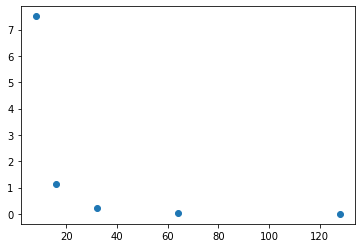

In [39]:
plt.scatter(list(error_dict.keys()), list(error_dict.values()))

In [100]:
time_dict = {}
for key in dos_dict.keys():
    directory = os.path.join('data', key)
    
    for file in os.listdir(directory):
        if file.find('SCBA.o') != -1:
            
            full_path = os.path.join(directory, file)
            text_file = open(full_path, "r")
            data = text_file.read()
            text_file.close()
            
            time_1, time_2 = re.findall("..:..:..", data)
            sec_1 = datetime.datetime.strptime(time_1, '%H:%M:%S').timestamp()
            sec_2 = datetime.datetime.strptime(time_2, '%H:%M:%S').timestamp()
            
            time_dict[key] = sec_2 - sec_1

In [128]:
def plot_one_dos(key, time, ax):
    
    ax.plot(dos_dict[key][:,0], dos_dict[key][:,1])

    ax.set_title(key[5:], fontsize = 16)
    
    ax.text(2, 0.8, f'Time: {time} seconds', fontsize = 16)

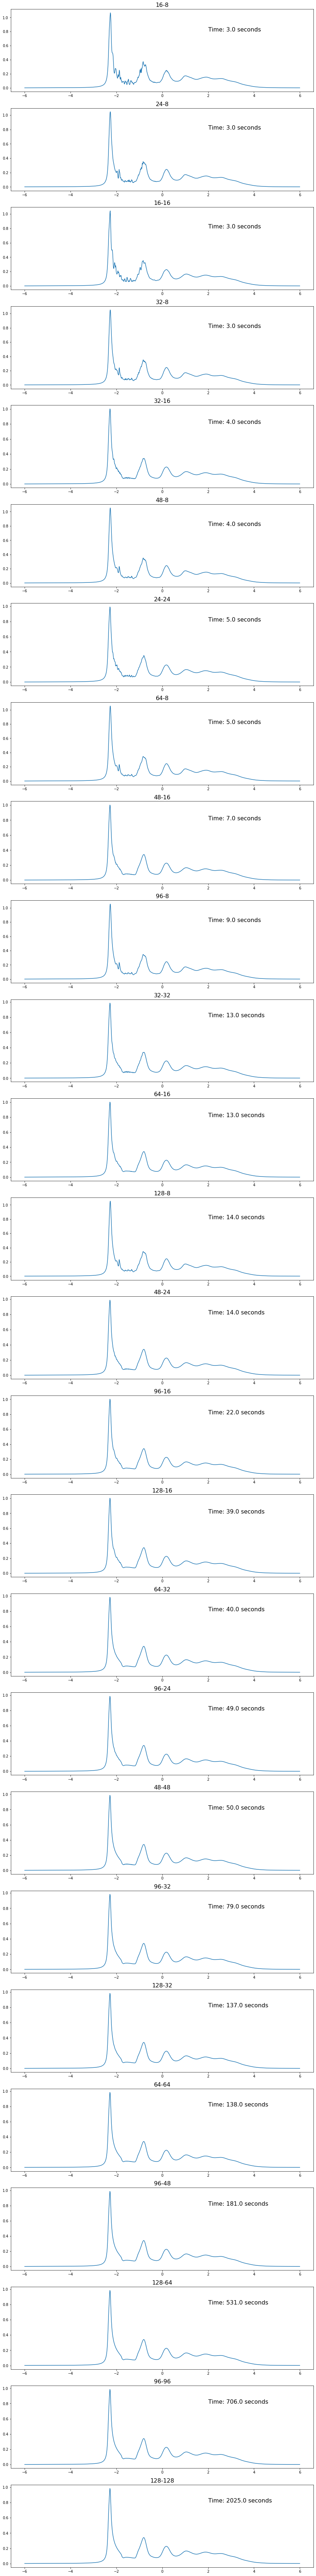

In [129]:
list_by_time = sorted(time_dict.items(), key=lambda item: item[1])
num_keys = len(list_by_time)

fig, ax = plt.subplots(num_keys, figsize = (15, 5*num_keys))

for i, (key, time) in enumerate(list_by_time):
    
    plot_one_dos(key, time, ax[i])

plt.savefig('test-fig.pdf')  

In [19]:
arpes = np.loadtxt('data/Grid-128-128/arpes11-10.dat')

print(arpes.shape)

(300, 18)
